In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Breast_cancer_data[1].csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
#adding a new column for the line intercept and initializing with ones
#inserting a new column as first column
# df.insert(loc=0,column='theta0',value=1)
# df
df = np.array(df)
np.random.shuffle(df)
df

array([[1.371e+01, 2.083e+01, 9.020e+01, 5.779e+02, 1.189e-01, 0.000e+00],
       [9.173e+00, 1.386e+01, 5.920e+01, 2.609e+02, 7.721e-02, 1.000e+00],
       [1.286e+01, 1.800e+01, 8.319e+01, 5.063e+02, 9.934e-02, 1.000e+00],
       ...,
       [1.340e+01, 1.695e+01, 8.548e+01, 5.524e+02, 7.937e-02, 1.000e+00],
       [9.876e+00, 1.940e+01, 6.395e+01, 2.983e+02, 1.005e-01, 1.000e+00],
       [1.206e+01, 1.274e+01, 7.684e+01, 4.486e+02, 9.311e-02, 1.000e+00]])

In [4]:
for i in range(df.shape[0]):
    if df[i,-1]==0: df[i,-1]=-1

In [5]:
#splitting the dataset into training and testing set
r = df.shape[0]
c = df.shape[1]
#df = np.array(df)
idx = 8*r//10
x_train = df[:idx,:c-1]
y_train = df[:idx,-1]
x_test  = df[idx:,:c-1]
y_test  = df[idx:,-1]
print("x training data:")
print(x_train,end="\n\n")
print("y training data:")
print(y_train,end="\n\n")
print("x testing data:")
print(x_test,end="\n\n")
print("y testing data:")
print(y_test)

x training data:
[[1.371e+01 2.083e+01 9.020e+01 5.779e+02 1.189e-01]
 [9.173e+00 1.386e+01 5.920e+01 2.609e+02 7.721e-02]
 [1.286e+01 1.800e+01 8.319e+01 5.063e+02 9.934e-02]
 ...
 [2.309e+01 1.983e+01 1.521e+02 1.682e+03 9.342e-02]
 [1.464e+01 1.685e+01 9.421e+01 6.660e+02 8.641e-02]
 [1.305e+01 1.931e+01 8.261e+01 5.272e+02 8.060e-02]]

y training data:
[-1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.
 -1.  1. -1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1. -1.
 -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
  1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.
  1.  1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1.
  1. -1.  1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.
  1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.
  1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1. 

In [6]:
#normalizing the data
for c in range(x_train.shape[1]):
    if c!='theta0':
        min_train = np.min(x_train[:,c])
        max_train = np.max(x_train[:,c])
        x_train[:,c]=(x_train[:,c]-min_train)/(max_train-min_train)
        x_test[:,c]=(x_test[:,c]-min_train)/(max_train-min_train)
print(x_train,end="\n\n")
print(x_test)

[[0.31847224 0.46141079 0.32071039 0.18426299 0.73739846]
 [0.10374367 0.17219917 0.10648884 0.04979852 0.27350618]
 [0.27824317 0.3439834  0.27226868 0.15389183 0.51975075]
 ...
 [0.76241185 0.41991701 0.74846244 0.65259809 0.45387782]
 [0.36248758 0.29626556 0.34842098 0.22163309 0.37587627]
 [0.28723555 0.39834025 0.26826066 0.16275716 0.31122733]]

[[0.07525202 0.1406639  0.0742174  0.03300106 0.56715255]
 [0.15802925 0.27551867 0.14871122 0.07694592 0.46411483]
 [0.4320602  0.34605809 0.42367494 0.28398727 0.49604985]
 [0.20961711 0.04605809 0.20420151 0.11020148 0.45732725]
 [0.57357187 0.6879668  0.58952388 0.41930011 0.76632914]
 [0.48317478 0.51286307 0.46859236 0.33289502 0.49660621]
 [0.36438071 0.43236515 0.35208348 0.22948038 0.51229554]
 [0.34402953 0.49834025 0.34441296 0.20763521 0.50739958]
 [0.59676274 0.63443983 0.57984935 0.44432662 0.56270168]
 [0.257892   0.30248963 0.24055007 0.14159067 0.25525759]
 [0.14430404 0.48008299 0.13406123 0.06948038 0.31756982]
 [0.246

In [7]:
#converting the training and testing datasets into numpy arrays
# x_train = np.array(x_train)
# x_test = np.array(x_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [8]:
# Using hinge loss function
# def hypothesis(x,w):
#     return np.dot(x,w)


def grad_descent(x,y,reg,alpha,epoch):
    r=x.shape[0]
    c=x.shape[1]
    w = np.ones((c,1))
    b=0
    min_w=[]
    min_b=None
    min_cost=None
    cost_list=[]
    for itr in range(epoch):
        cost = reg*np.dot(w.T,w)
        for i in range(r):
            if y[i]*np.dot(x[i],w)<1:
                for j in range(c):
                    w[j]-=alpha*(2*reg*w[j]-y[i]*x[i,j])
                b-=alpha*y[i]*-1
            else:
                for j in range(c):
                    w[j]-=alpha*(2*reg*w[j])
                cost+= 1-y[i]*np.dot(x[i],w)  
        #print(cost)
        cost_list.append(cost[0])
        if min_cost is None or min_cost>cost:
            min_cost=cost
            min_w=w
            min_b=b
            
    return min_w,min_b,np.array(cost_list)

def plotCost(cost):
    plt.plot(cost)
    plt.xlabel('no. of iterations')
    plt.ylabel('cost')
    
def calAccuracy(pred,y_):
    correct=0
    for i in range(len(pred)):
        if pred[i]==y_[i]:
            correct+=1
    return correct*100/len(pred)

def predict(x_,y_,w,b):
    py = np.dot(x_,w)+b
    py=list(py)
    for i in range(len(py)):
        if py[i]>=1:
            py[i]=1
        else:
            py[i]=-1
    return py

def showPredictions(pred,y_):
    for i in range(len(pred)):
        print("predicted: ",pred[i],end='  ')
        print("actual: ",y_[i])

[[-1.0264605 ]
 [ 1.10397693]
 [-1.49643678]
 [-2.32851365]
 [ 2.4369736 ]] -0.14999999999999997
(1000, 1)
accuracy of model: 47.36842105263158%


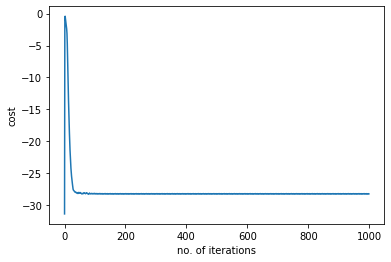

In [9]:
alpha = 0.01
epoch = 1000
reg = 0.005 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [10]:
showPredictions(pred_y,y_test)

predicted:  1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
pre

[[-0.77157094]
 [ 1.20116848]
 [-1.23703697]
 [-2.12813759]
 [ 2.56477799]] 48.23999999999933
(1000, 1)
accuracy of model: 63.1578947368421%


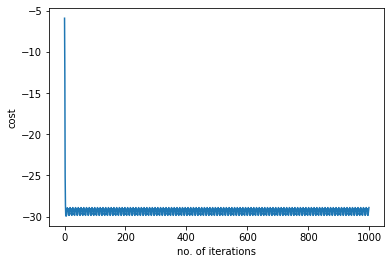

In [11]:
alpha = 0.08
epoch = 1000
reg = 0.005 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[-0.80692375]
 [ 1.2748013 ]
 [-1.27197802]
 [-2.16736434]
 [ 2.62517689]] 196.8999999999931
(1000, 1)
accuracy of model: 63.1578947368421%


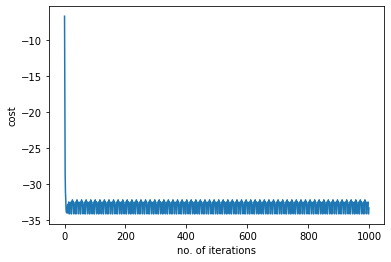

In [12]:
alpha = 0.1
epoch = 1000
reg = 0.005 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[-0.12494892]
 [ 0.37008558]
 [-0.17731086]
 [-0.33955307]
 [ 0.85115795]] 10.499999999999979
(1000, 1)
accuracy of model: 63.1578947368421%


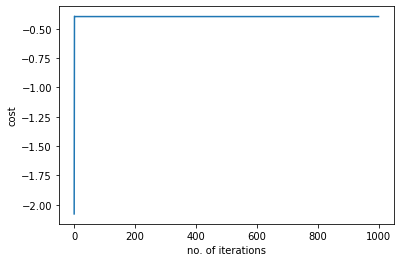

In [13]:
alpha = 0.1
epoch = 1000
reg = 0.05 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[-0.02118467]
 [ 0.0320733 ]
 [-0.02632808]
 [-0.04163721]
 [ 0.07934151]] 0.9400000000000006
(1000, 1)
accuracy of model: 37.719298245614034%


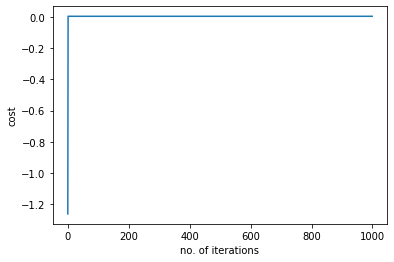

In [14]:
alpha = 0.01
epoch = 1000
reg = 0.5 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [15]:
showPredictions(pred_y,y_test)

predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  -1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
predicted:  -1  actual:  1.0
p

[[-0.30839349]
 [ 0.28021732]
 [-0.35457284]
 [-0.47012731]
 [ 0.68555442]] 0.3200000000000002
(1000, 1)
accuracy of model: 37.719298245614034%


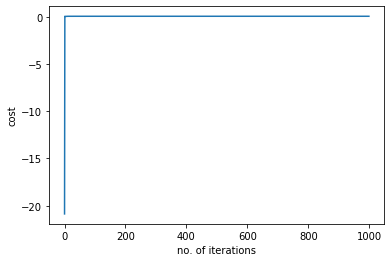

In [16]:
alpha = 0.01
epoch = 1000
reg = 0.05 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[0.00658356]
 [0.01148923]
 [0.00598356]
 [0.0010308 ]
 [0.02021707]] 2.289999999999995
(1000, 1)
accuracy of model: 63.1578947368421%


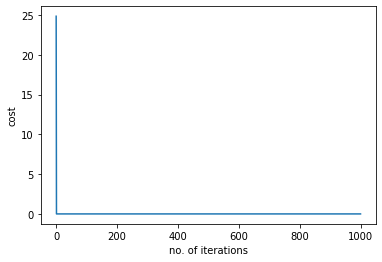

In [17]:
alpha = 0.01
epoch = 1000
reg = 5 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [18]:
showPredictions(pred_y,y_test)

predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predic

[[0.26100978]
 [0.34999453]
 [0.24402583]
 [0.14319577]
 [0.29169659]] 212.80000000000086
(500, 1)
accuracy of model: 63.1578947368421%


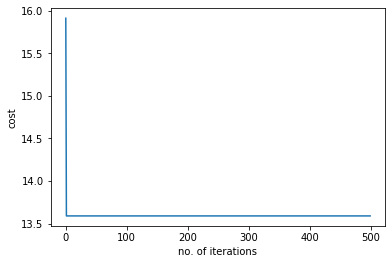

In [19]:
alpha = 0.8
epoch = 500
reg = 0.5 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")